# Exploratory Data Analysis (EDA) on Data Science Job Listings

## Introduction

The goal of this analysis is to explore a dataset containing job listings in the data science domain. The dataset includes information such as job titles, salary estimates, company ratings, job locations, and more. Through this EDA, we aim to uncover insights about salary trends, job roles, seniority levels, skill requirements, and other job-related factors.itial cleanup


In [1]:
!pip install numpy pandas matplotlib seaborn wordcloud

## 1. Data Cleaning and Preprocessing

## Importing Libraries

We start by importing necessary libraries for data manipulation, visualization, and word cloud generation.

In [1]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

## Loading the Dataset

We load the dataset and take a look at its structure and some initial rows.


In [2]:
df = pd.read_csv("glassdoor_jobs.csv")

In [3]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors'],
      dtype='object')

In [4]:
df.shape

(956, 15)

In [5]:
df.head(10)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\r\nLocation: Albuquerque, NM\r\...",3.8,Tecolote Research\r\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\r\n\r\nI. General Summary\r\...,3.4,University of Maryland Medical System\r\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\r\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\r\nJob ID: 310709\r...,3.8,PNNL\r\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\r\nAffinity Solutions / Marketi...,2.9,Affinity Solutions\r\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"
5,5,Data Scientist,$71K-$119K (Glassdoor est.),CyrusOne is seeking a talented Data Scientist ...,3.4,CyrusOne\r\n3.4,"Dallas, TX","Dallas, TX",201 to 500 employees,2000,Company - Public,Real Estate,Real Estate,$1 to $2 billion (USD),"Digital Realty, CoreSite, Equinix"
6,6,Data Scientist,$54K-$93K (Glassdoor est.),Job Description\r\n\r\n**Please only local can...,4.1,ClearOne Advantage\r\n4.1,"Baltimore, MD","Baltimore, MD",501 to 1000 employees,2008,Company - Private,Banks & Credit Unions,Finance,Unknown / Non-Applicable,-1
7,7,Data Scientist,$86K-$142K (Glassdoor est.),Advanced Analytics – Lead Data Scientist\r\nOv...,3.8,Logic20/20\r\n3.8,"San Jose, CA","Seattle, WA",201 to 500 employees,2005,Company - Private,Consulting,Business Services,$25 to $50 million (USD),-1
8,8,Research Scientist,$38K-$84K (Glassdoor est.),SUMMARY\r\n\r\nThe Research Scientist I will b...,3.3,Rochester Regional Health\r\n3.3,"Rochester, NY","Rochester, NY",10000+ employees,2014,Hospital,Health Care Services & Hospitals,Health Care,$500 million to $1 billion (USD),-1
9,9,Data Scientist,$120K-$160K (Glassdoor est.),isn’t your usual company. Our work is powered ...,4.6,<intent>\r\n4.6,"New York, NY","New York, NY",51 to 200 employees,2009,Company - Private,Internet,Information Technology,$100 to $500 million (USD),"Clicktripz, SmarterTravel"


## Data Cleaning

### 1. Drop Unnecessary Columns
We drop any columns that are not needed for our analysis.


In [6]:
# 1. Drop unnecessary columns
df = df.drop(['Unnamed: 0'], axis=1)

In [9]:
#df.head()

### 2. Filter Out Missing Salary Estimates
We filter out rows where salary estimates are missing or invalid.


In [7]:
# 2. Filter out missing salary estimates
df = df[df['Salary Estimate'] != '-1']

### 3. Clean the 'Salary Estimate' Column
We remove unwanted characters and extract salary information.


In [8]:
# 3. Clean the 'Salary Estimate' column by removing unwanted characters
df['Salary Estimate'] = df['Salary Estimate'].apply(lambda x: x.split('(')[0])

In [9]:
df.head(10)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,Data Scientist,$53K-$91K,"Data Scientist\r\nLocation: Albuquerque, NM\r\...",3.8,Tecolote Research\r\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,Healthcare Data Scientist,$63K-$112K,What You Will Do:\r\n\r\nI. General Summary\r\...,3.4,University of Maryland Medical System\r\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,Data Scientist,$80K-$90K,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\r\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,Data Scientist,$56K-$97K,*Organization and Job ID**\r\nJob ID: 310709\r...,3.8,PNNL\r\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,Data Scientist,$86K-$143K,Data Scientist\r\nAffinity Solutions / Marketi...,2.9,Affinity Solutions\r\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"
5,Data Scientist,$71K-$119K,CyrusOne is seeking a talented Data Scientist ...,3.4,CyrusOne\r\n3.4,"Dallas, TX","Dallas, TX",201 to 500 employees,2000,Company - Public,Real Estate,Real Estate,$1 to $2 billion (USD),"Digital Realty, CoreSite, Equinix"
6,Data Scientist,$54K-$93K,Job Description\r\n\r\n**Please only local can...,4.1,ClearOne Advantage\r\n4.1,"Baltimore, MD","Baltimore, MD",501 to 1000 employees,2008,Company - Private,Banks & Credit Unions,Finance,Unknown / Non-Applicable,-1
7,Data Scientist,$86K-$142K,Advanced Analytics – Lead Data Scientist\r\nOv...,3.8,Logic20/20\r\n3.8,"San Jose, CA","Seattle, WA",201 to 500 employees,2005,Company - Private,Consulting,Business Services,$25 to $50 million (USD),-1
8,Research Scientist,$38K-$84K,SUMMARY\r\n\r\nThe Research Scientist I will b...,3.3,Rochester Regional Health\r\n3.3,"Rochester, NY","Rochester, NY",10000+ employees,2014,Hospital,Health Care Services & Hospitals,Health Care,$500 million to $1 billion (USD),-1
9,Data Scientist,$120K-$160K,isn’t your usual company. Our work is powered ...,4.6,<intent>\r\n4.6,"New York, NY","New York, NY",51 to 200 employees,2009,Company - Private,Internet,Information Technology,$100 to $500 million (USD),"Clicktripz, SmarterTravel"


### 4. Extract PerHour and Employer Provided Salary
We create binary indicators to identify if a salary is hourly or employer-provided.


In [10]:
# 4. Extract PerHour and Employer Provided Salary
df['PerHour'] = df['Salary Estimate'].apply(lambda x: 1 if 'per hour' in x.lower() else 0)
df['Employer_Provided'] = df['Salary Estimate'].apply(lambda x: 1 if 'employer provided salary' in x.lower() else 0)

### 5. Remove Salary Descriptors
We remove the descriptors to keep only the numeric values for salary estimates.


In [15]:
# 5. Remove 'per hour' and 'employer provided salary' from salary estimates
df['Salary Estimate'] = df['Salary Estimate'].str.lower().str.replace('per hour', '', regex=False).str.replace('employer provided salary:', '', regex=False)

# Remove '$' and 'k', convert the salary to numeric
df['Salary Estimate'] = df['Salary Estimate'].str.replace('k', '', regex=False).str.replace('$', '', regex=False)



### 6. Extract Minimum and Maximum Salary
We split the salary estimates into minimum and maximum salary.


In [16]:
# 6.Split the salary range, handle missing max values
df['Min_Salary'] = df['Salary Estimate'].apply(lambda x: int(x.split('-')[0].strip()))
df['Max_Salary'] = df['Salary Estimate'].apply(lambda x: int(x.split('-')[1].strip()) if '-' in x else df['Min_Salary'])



### 7. Calculate Average Salary
We calculate the average salary based on the minimum and maximum salary.


In [17]:
# 7. Calculate the average salary
df['Avg_Salary'] = (df['Min_Salary'] + df['Max_Salary']) / 2


## Job Title Simplification
We simplify job titles into broader categories for easier analysis.


In [18]:
def title_simplifier(title):
    title = title.lower()
    if 'data scientist' in title:
        return 'data scientist'
    elif 'data engineer' in title:
        return 'data engineer'
    elif 'analyst' in title:
        return 'analyst'
    elif 'machine learning' in title:
        return 'machine learning engineer'
    elif 'manager' in title:
        return 'manager'
    elif 'director' in title:
        return 'director'
    else:
        return 'other'

df['Job_Simplified'] = df['Job Title'].apply(title_simplifier)

## Classifying Seniority Levels
We classify job titles into seniority levels based on keywords.


In [19]:
# 9. Classify seniority levels
def seniority(title):
    title = title.lower()
    if 'senior' in title or 'lead' in title or 'principal' in title:
        return 'senior'
    elif 'jr' in title or 'junior' in title:
        return 'junior'
    else:
        return 'mid-level'

df['Seniority'] = df['Job Title'].apply(seniority)


## Extracting Location and Company Age
We extract location information and calculate the age of the company based on the year it was founded.


In [20]:
# 10. Extract location state
df['Job_State'] = df['Location'].apply(lambda x: x.split(',')[1].strip() if ',' in x else x)

In [21]:
# 11. Calculate company age
df['Company_Age'] = df['Founded'].apply(lambda x: 2023 - x if x > 0 else -1)

## Using Regular Expressions for Data Extraction from Job Descriptions

In this analysis, we leverage regular expressions (regex) to efficiently extract relevant information from job descriptions. Below are the key regex patterns used in the analysis:
**. **Extracting Programming Langs**es**:
   - The regex pattern used is `\b(Python|Java|R|SQL|C\+\+|JavaScript|Ruby|Perl|Scala|Go)\b`, which matches whole words of popular programming languages. The use of word boundaries (`\b`) ensures we only capture complete words, avoiding partial matata for analysis.



In [28]:
# Extracting programming languages
def extract_languages(description):
    pattern = r'\b(Python|Java|R|SQL|C\+\+|JavaScript|Ruby|Perl|Scala|Go)\b'
    return list(set(re.findall(pattern, description, re.IGNORECASE)))

df['Languages'] = df['Job Description'].apply(extract_languages)


2. **Extracting Tools and Technologies**:
   - Similar to the languages, we use `\b(AWS|Azure|Hadoop|Spark|Docker|Kubernetes|Tableau|PowerBI|NLP|Machine Learning|Big Data)\b` to match a list of tools that are common in data science job postings.

In [29]:
# Function to extract tools and technologies
def extract_tools(description):
    # Create a pattern to match tools and technologies
    pattern = r'\b(AWS|Azure|Hadoop|Spark|Docker|Kubernetes|Tableau|PowerBI|NLP|Machine Learning|Big Data)\b'
    return list(set(re.findall(pattern, description, re.IGNORECASE)))
df['tools'] = df['Job Description'].apply(extract_tools)


3. **Identifying Remote Job Opportunities**:
   - To determine if a job is remote, we use the pattern `\b(remote|work from home|telecommute|virtual)\b`, which captures various phrases that indicate remote work options.

In [24]:
# Detect remote jobs
def is_remote(description):
    pattern = r'\b(remote|work from home|telecommute|virtual)\b'
    return 1 if re.search(pattern, description, re.IGNORECASE) else 0

df['Remote_Job'] = df['Job Description'].apply(is_remote)

## Extracting Salary and Experience Information
We extract any salary information and years of experience required from job descriptions.


4. **Extracting Salary Information**:
   - For salary extraction, we employ `\$?\d{1,3}(?:,\d{3})*(?:K|k)?(?:\.\d{1,2})?`, which accommodates various salary formats, including dollar signs, commas for thousands, and optional 'K' denoting thousands.

In [25]:
# Extract salary information
def extract_salary(description):
    pattern = r'\$?\d{1,3}(?:,\d{3})*(?:K|k)?(?:\.\d{1,2})?'
    match = re.findall(pattern, description)
    return match if match else 'No Salary Info'

df['Salary_Info'] = df['Job Description'].apply(extract_salary)

5. **Capturing Years of Experience**:
   - The regex `(\d+)[+ -]?\s*(years|yrs)\s*(experience)?` is used to find mentions of experience requirements, capturing the number of years as well as the associated terms.

In [26]:
# Extract years of experience
def extract_years_experience(description):
    pattern = r'(\d+)[+ -]?\s*(years|yrs)\s*(experience)?'
    experience = re.findall(pattern, description, re.IGNORECASE)
    return [match[0] for match in experience] if experience else 'Not Specified'

df['Years_Experience'] = df['Job Description'].apply(extract_years_experience)

## Creating Binary Indicators for Skills and Tools
We create binary indicators for each programming language and tool to facilitate analysis.


In [42]:
# Updated languages dictionary
languages_tools = {
    'Python': r'\bPython\b',
    'Java': r'\bJava\b',
    'R': r'\bR\b',
    'SQL': r'\bSQL\b',
    'C++': r'\bC\+\+\b',
    'JavaScript': r'\b(JavaScript|js)\b',
    'Ruby': r'\bRuby\b',
    'Perl': r'\bPerl\b',
    'Scala': r'\bScala\b',
    'Go': r'\bGo\b',
    'AWS': r'\bAWS\b',
    'Azure': r'\bAzure\b',
    'Hadoop': r'\bHadoop\b',
    'Spark': r'\bSpark\b',
    'Docker': r'\bDocker\b',
    'Kubernetes': r'\bKubernetes\b',
    'Tableau': r'\bTableau\b',
    'Power BI': r'\b(PowerBI|Power BI)\b',
    'NLP': r'\bNLP\b',
    'Machine Learning': r'\b(Machine Learning|ML)\b',
    'Big Data': r'\b(Big Data|Hadoop)\b'
}

# Function to create binary indicators for each language/tool
def create_language_indicators(df, languages_tools):
    for tool, pattern in languages_tools.items():
        df[tool + '_yn'] = df['Job Description'].apply(
            lambda x: 1 if re.search(pattern, x, re.IGNORECASE) else 0
        )
    return df

# Apply the function to the DataFrame
df = create_language_indicators(df, languages_tools)


In [29]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,Azure_yn,Hadoop_yn,Spark_yn,Docker_yn,Kubernetes_yn,Tableau_yn,Power BI_yn,NLP_yn,Machine Learning_yn,Big Data_yn
0,Data Scientist,53-91,"Data Scientist\r\nLocation: Albuquerque, NM\r\...",3.8,Tecolote Research\r\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,0,0,0,0,0,1,1,0,1,0
1,Healthcare Data Scientist,63-112,What You Will Do:\r\n\r\nI. General Summary\r\...,3.4,University of Maryland Medical System\r\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,0,0,0,0,0,0,0,0,1,0
2,Data Scientist,80-90,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\r\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,0,0,1,0,0,0,0,0,1,1
3,Data Scientist,56-97,*Organization and Job ID**\r\nJob ID: 310709\r...,3.8,PNNL\r\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,0,0,0,0,0,0,0,0,1,0
4,Data Scientist,86-143,Data Scientist\r\nAffinity Solutions / Marketi...,2.9,Affinity Solutions\r\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,0,0,0,0,0,0,0,0,1,0


In [30]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'PerHour', 'Employer_Provided', 'Min_Salary', 'Max_Salary',
       'Avg_Salary', 'Job_Simplified', 'Seniority', 'Job_State', 'Company_Age',
       'Languages', 'Remote_Job', 'Salary_Info', 'Years_Experience',
       'Python_yn', 'Java_yn', 'R_yn', 'SQL_yn', 'C++_yn', 'JavaScript_yn',
       'Ruby_yn', 'Perl_yn', 'Scala_yn', 'Go_yn', 'AWS_yn', 'Azure_yn',
       'Hadoop_yn', 'Spark_yn', 'Docker_yn', 'Kubernetes_yn', 'Tableau_yn',
       'Power BI_yn', 'NLP_yn', 'Machine Learning_yn', 'Big Data_yn'],
      dtype='object')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 742 entries, 0 to 955
Data columns (total 48 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Job Title            742 non-null    object 
 1   Salary Estimate      742 non-null    object 
 2   Job Description      742 non-null    object 
 3   Rating               742 non-null    float64
 4   Company Name         742 non-null    object 
 5   Location             742 non-null    object 
 6   Headquarters         742 non-null    object 
 7   Size                 742 non-null    object 
 8   Founded              742 non-null    int64  
 9   Type of ownership    742 non-null    object 
 10  Industry             742 non-null    object 
 11  Sector               742 non-null    object 
 12  Revenue              742 non-null    object 
 13  Competitors          742 non-null    object 
 14  PerHour              742 non-null    int64  
 15  Employer_Provided    742 non-null    int64  


In [44]:
# Save the cleaned dataframe to a CSV file
df.to_csv('cleaned_data_science_jobs.csv', index=False)

## Data Visualization

### 1. Job Title Distribution
We visualize the distribution of job titles in the data science market.


In [57]:
# Define the purple color palette
purple_colors = {
    'dark_purple' : '#301934',  
    'light_purple': '#CBC3E3',  
    'light_violet': '#CF9FFF',  
    'lilac': '#AA98A9',           
    'mauve': '#E0B0FF',        
    'mauve_taupe': '#915F6D', 
    'pastel_purple':'#C3B1E1',
    'thistle':'#D8BFD8'
}

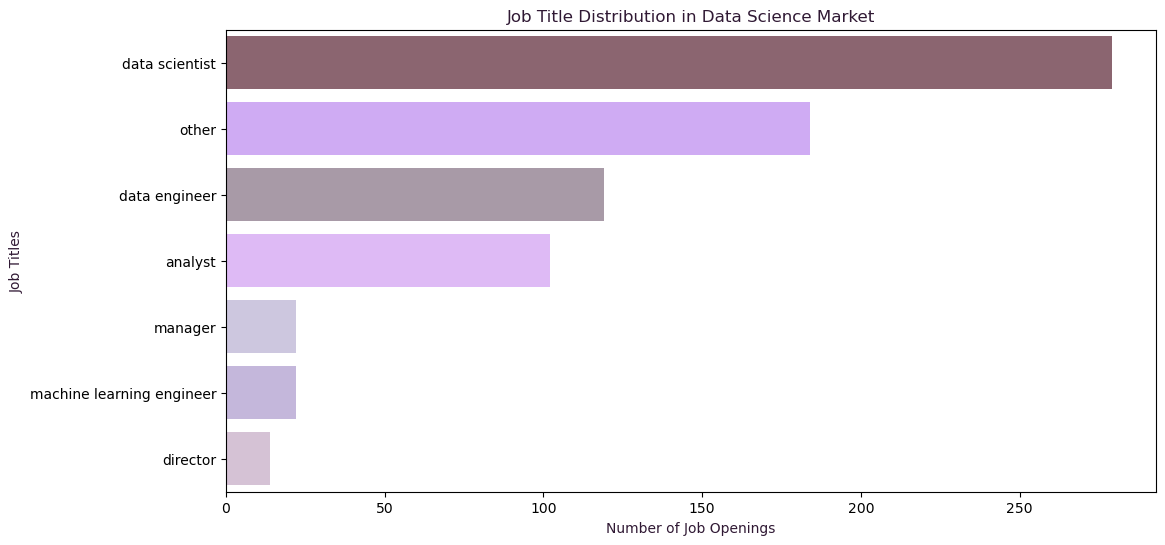

In [35]:
plt.figure(figsize=(12, 6))
sns.countplot(y='Job_Simplified', data=df, order=df['Job_Simplified'].value_counts().index, 
               palette=[purple_colors['mauve_taupe'], purple_colors['light_violet'], purple_colors['lilac'], purple_colors['mauve'] , purple_colors['light_purple'], purple_colors['pastel_purple'],purple_colors['thistle']])
plt.title('Job Title Distribution in Data Science Market', color=purple_colors['dark_purple'])
plt.xlabel('Number of Job Openings', color=purple_colors['dark_purple'])
plt.ylabel('Job Titles', color=purple_colors['dark_purple'])
plt.show()

Observation: Data Scientist, Analyst, and Data Engineer roles are the most prevalent, indicating their high demand in the industry.

### 2. Seniority Level Distribution
We visualize the distribution of seniority levels in data science jobs.


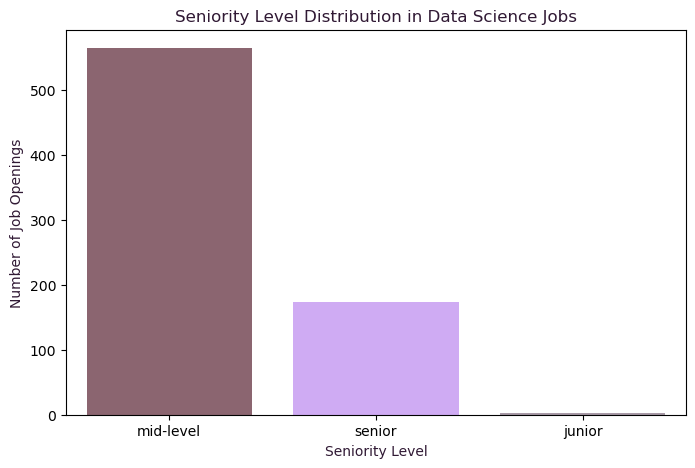

In [36]:
# Visualizing seniority level distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Seniority', data=df, order=df['Seniority'].value_counts().index, 
               palette=[purple_colors['mauve_taupe'], purple_colors['light_violet'], purple_colors['lilac']])
plt.title('Seniority Level Distribution in Data Science Jobs', color=purple_colors['dark_purple'])
plt.xlabel('Seniority Level', color=purple_colors['dark_purple'])
plt.ylabel('Number of Job Openings', color=purple_colors['dark_purple'])
plt.show()

Observation: The majority of jobs are aimed at mid-level professionals, suggesting fewer opportunities for entry-level or highly senior positions.

### 3. Salary Distribution by Job Title
We visualize the salary distribution across different job titles.


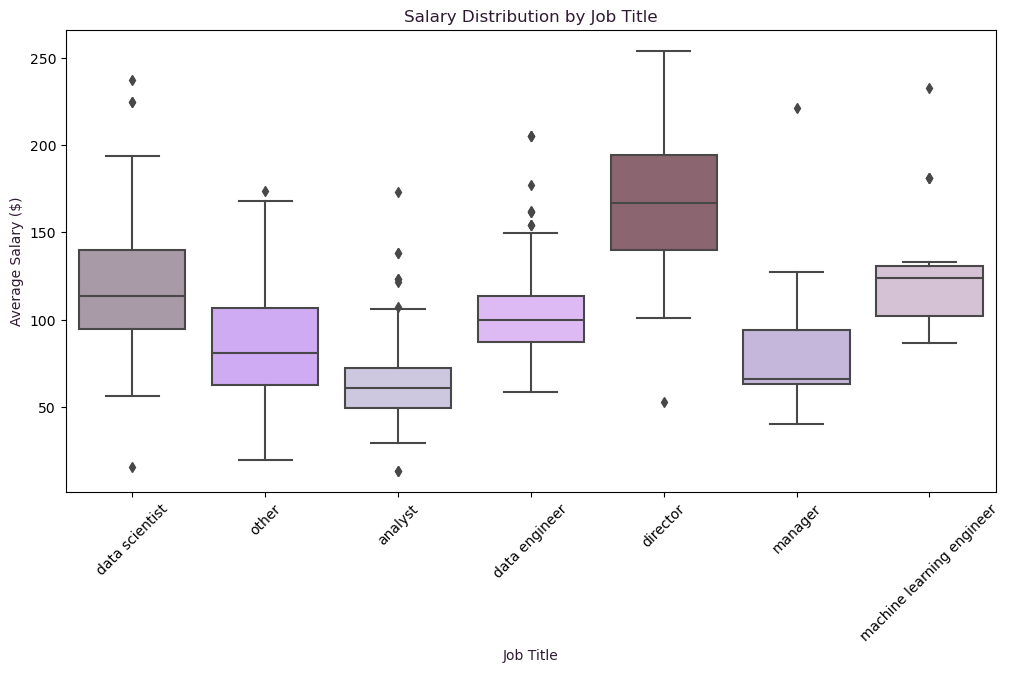

In [37]:
#Salary distribution Job title
plt.figure(figsize=(12, 6))
sns.boxplot(x='Job_Simplified', y='Avg_Salary', data=df, 
             palette=[purple_colors['lilac'], purple_colors['light_violet'], purple_colors['light_purple'], purple_colors['mauve'] , purple_colors['mauve_taupe'], purple_colors['pastel_purple'],purple_colors['thistle']])
plt.title('Salary Distribution by Job Title', color=purple_colors['dark_purple'])
plt.xticks(rotation=45)
plt.xlabel('Job Title', color=purple_colors['dark_purple'])
plt.ylabel('Average Salary ($)', color=purple_colors['dark_purple'])
plt.show()

Observation: Leadership roles like Director and technical roles like Data Scientist and Machine Learning Engineer seem to command higher salaries compared to analyst or manager positions.
Few outliers in the plot, especially for roles like Analyst, Data engineer, Machine learning engineer , Data Scientist and Director indicating a few extreme values, possibly highly-paid or underpaid individuals compared to their peers.

### 4. Distribution of Remote Jobs
We visualize the distribution of remote jobs in the dataset.


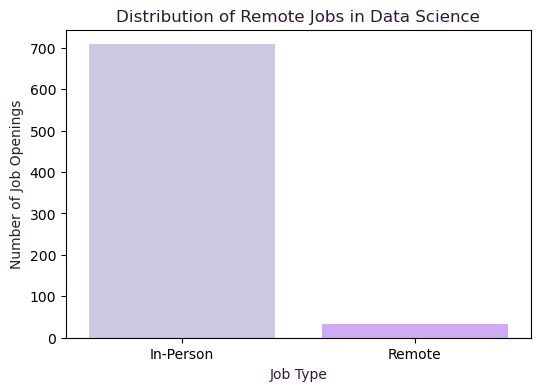

In [38]:
#remote job
plt.figure(figsize=(6, 4))
sns.countplot(x='Remote_Job', data=df, 
               palette=[purple_colors['light_purple'], purple_colors['light_violet']])
plt.title('Distribution of Remote Jobs in Data Science', color=purple_colors['dark_purple'])
plt.xticks(ticks=[0, 1], labels=['In-Person', 'Remote'])
plt.xlabel('Job Type', color=purple_colors['dark_purple'])
plt.ylabel('Number of Job Openings', color=purple_colors['dark_purple'])
plt.show()

Observation: Remote jobs are fewer in number compared to in-office roles, though remote work is present as an option.

### 5. Skills Required in Job Listings
We visualize the count of job listings requiring specific skills.


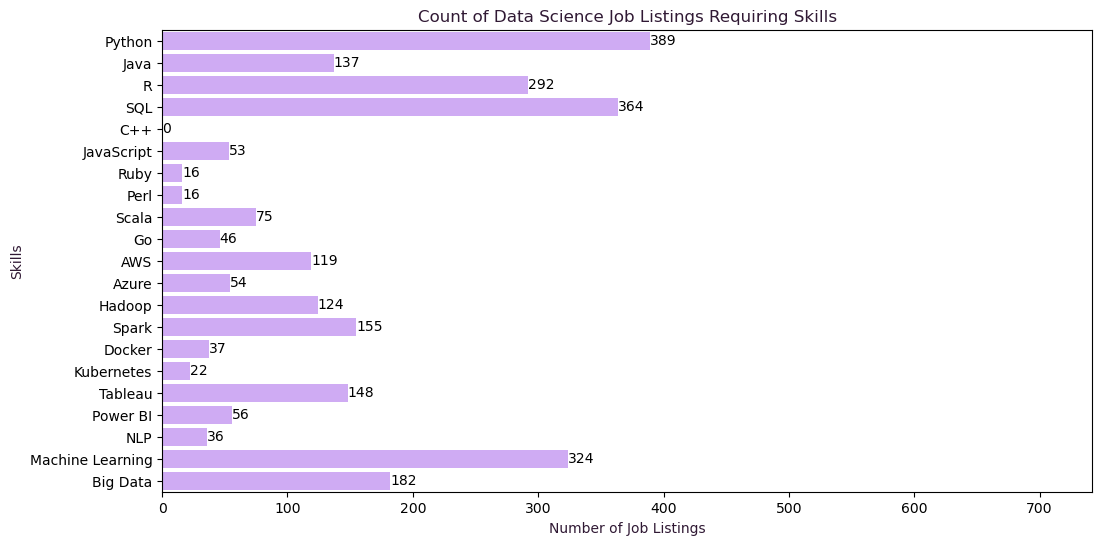

In [43]:
# List of skill columns for visualization
skill_columns = [tool + '_yn' for tool in languages_tools.keys()]

# Create a DataFrame for counts of each skill
skill_counts = df[skill_columns].sum().reset_index()
skill_counts.columns = ['Skill', 'Count']

# Remove '_yn' suffix from skill names
skill_counts['Skill'] = skill_counts['Skill'].str.replace('_yn', '')

# Create a horizontal bar plot for skill counts
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x='Count', y='Skill', data=skill_counts, palette=[purple_colors['light_violet']])

# Add count annotations on the bars
for index, row in skill_counts.iterrows():
    bar_plot.text(row['Count'], index, f"{row['Count']}", color='black', va='center')

plt.title('Count of Data Science Job Listings Requiring Skills', color=purple_colors['dark_purple'])
plt.xlabel('Number of Job Listings', color=purple_colors['dark_purple'])
plt.ylabel('Skills', color=purple_colors['dark_purple'])
plt.xlim(0, df.shape[0])  # Set x-limits from 0 to the total number of job listings
plt.show()

Observation: Python is the most in-demand skill, followed closely by SQL and AWS, indicating the importance of these technologies in the field.


### 6. Years of Experience Required
We visualize the distribution of years of experience required for data science jobs.


In [49]:
# Check unique values in the Years_Experience column
print(df['Years_Experience'].unique())


['Not Specified' "['3', '3']" "['3', '2']" "['1', '1', '5']" "['2']"
 "['2', '4']" "['5', '3']" "['5']" "['3']" "['2', '2']" "['4', '6']"
 "['1']" "['5', '3', '3']" "['4']" "['3', '1']" "['15']"
 "['10', '10', '2']" "['20']" "['10']" "['2', '2', '2']"
 "['50', '1', '0']" "['3', '7']" "['5', '20']" "['7', '5']"
 "['5', '3', '3', '3']" "['7']" "['8']" "['8', '6']" "['10', '4', '6']"
 "['3', '3', '2', '3']" "['16']" "['4', '3']" "['9', '2']"
 "['5', '5', '4', '4', '3', '5']" "['8', '2']" "['3', '5']" "['50', '7']"
 "['5', '2']" "['4', '2', '0']" "['45', '4', '2']" "['2', '6', '8', '12']"
 "['5', '5']" "['1', '1', '2', '3', '1']" "['30']" "['7', '5', '3']"
 "['7', '7']" "['2', '3', '40']" "['50']" "['8', '3']" "['8', '5']"
 "['5', '10', '12']" "['10', '6']" "['2', '5']" "['5', '8']"
 "['80', '30', '7']" "['3', '2', '2']" "['5', '10', '10']" "['2', '3']"
 "['6']" "['4', '40']" "['10', '5']" "['4', '4', '4']" "['5', '40']"
 "['7', '10']" "['7', '5', '5', '5']" "['5', '3', '1', '3']"
 "['4', 

In [50]:
df['Years_Experience'] = df['Years_Experience'].fillna('Unknown')


In [51]:
df['Years_Experience'] = df['Years_Experience'].str.replace('years', '', regex=False)
df['Years_Experience'] = df['Years_Experience'].str.replace('+', '', regex=False)
df['Years_Experience'] = df['Years_Experience'].str.replace('-', ' ', regex=False)

In [52]:
# Extract the first numeric value from the string
df['Years_Experience'] = df['Years_Experience'].str.extract('(\d+)')


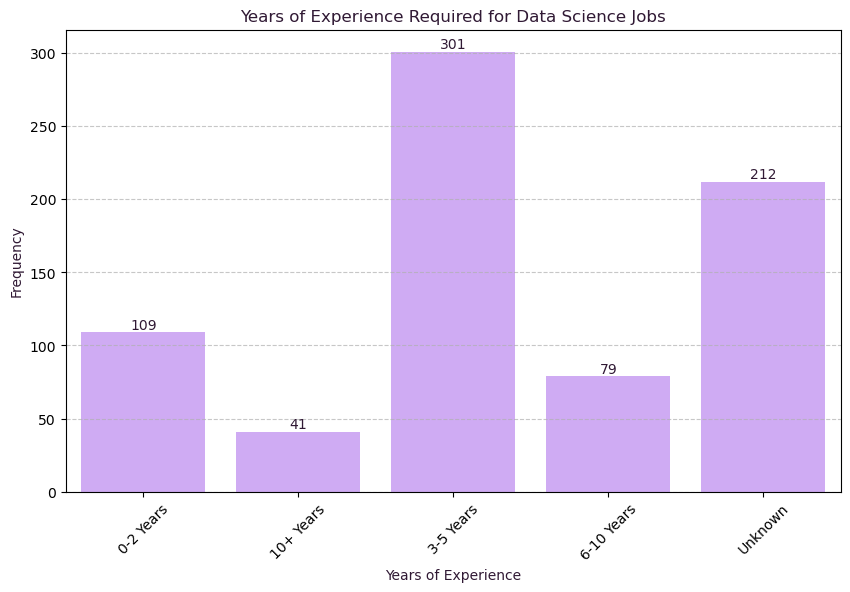

In [62]:
df['Years_Experience'] = df['Years_Experience'].apply(lambda x: str(x) if isinstance(x, list) else x)

def categorize_experience(years):
    try:
        years = int(years)
        if years < 3:
            return '0-2 Years'
        elif 3 <= years <= 5:
            return '3-5 Years'
        elif 6 <= years <= 10:
            return '6-10 Years'
        else:
            return '10+ Years'
    except ValueError:
        return 'Unknown'

df['Experience_Group'] = df['Years_Experience'].apply(categorize_experience)

# Count frequencies
experience_counts = df['Experience_Group'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=experience_counts.index, y=experience_counts.values, color=purple_colors['light_violet'])  
plt.title('Years of Experience Required for Data Science Jobs', color=purple_colors['dark_purple'])  
plt.xlabel('Years of Experience', color=purple_colors['dark_purple'])  
plt.ylabel('Frequency', color=purple_colors['dark_purple'])  
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars
for index, value in enumerate(experience_counts.values):
    plt.text(index, value, str(value), color=purple_colors['dark_purple'], ha='center', va='bottom')

plt.show()

Observation: Most jobs require between 3-5 years of experience, highlighting a strong demand for mid-level professionals.


### 7. Job Openings by State
We visualize the number of job openings by state in the dataset.


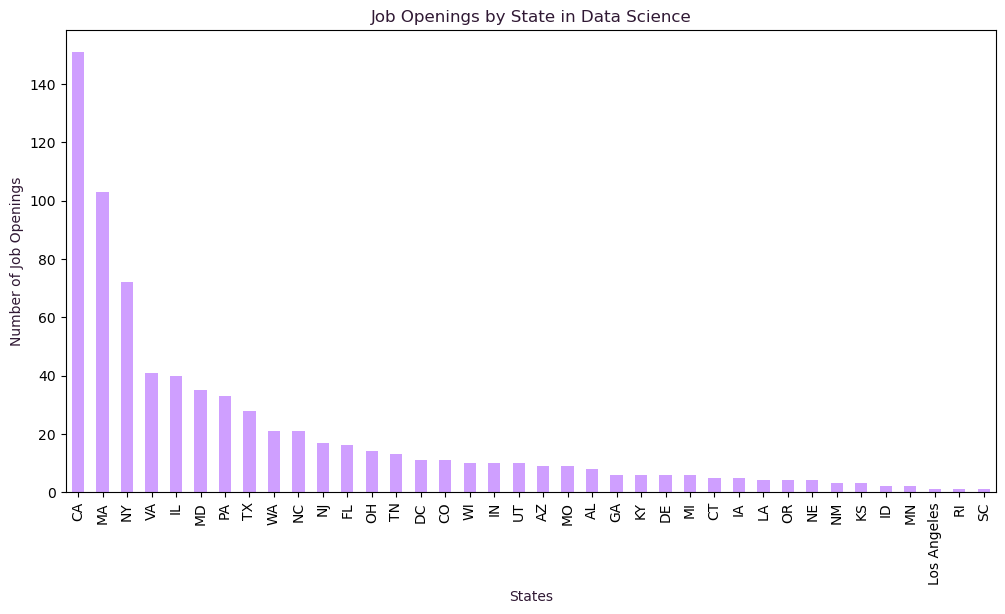

In [41]:
#location by state 
plt.figure(figsize=(12, 6))
df['Job_State'].value_counts().plot(kind='bar', color=purple_colors['light_violet'])
plt.title('Job Openings by State in Data Science', color=purple_colors['dark_purple'])
plt.ylabel('Number of Job Openings', color=purple_colors['dark_purple'])
plt.xlabel('States', color=purple_colors['dark_purple'])
plt.show()

Observation: California, Massachusetts, New York are the top states for data science job opportunities, reflecting their status as major tech hubs.

### 8. Word Cloud for Job Descriptions
We create a word cloud visualization for the most common words in job descriptions.


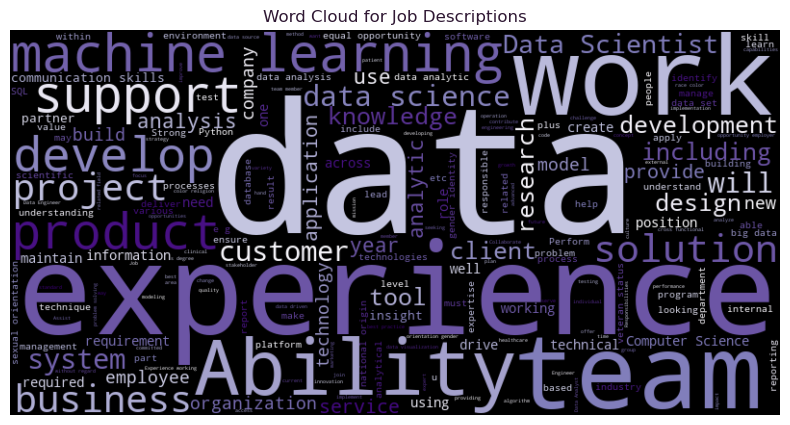

In [64]:
text = " ".join(description for description in df['Job Description'])
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Purples').generate(text)

# Display the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Job Descriptions', color=purple_colors['dark_purple'])
plt.show()

Observation: Frequent words include "data", "experience", "team", and "machine learning", highlighting the focus on data skills and teamwork in the industry.

## Conclusion
This analysis provides insights into the data science job market, including job title distributions, salary expectations, required skills, experience levels, and job types (remote vs. in-person). Such information can be valuable for job seekers and companies alike.

**High Demand Roles**: The most in-demand roles are Data Scientist, Analyst, and Data Engineer.
**Salary Distribution**: Engineering roles tend to command higher salaries than analytical roles.
**Skill Requirements**: Python, SQL, and cloud-based skills like AWS are critical for most data science roles.
**Experience Requirements**: A majority of jobs require mid-level experience (3-5 years).
**Location Trends**: The bulk of job listings are concentrated in tech-heavy states like California, Texas, and New York.